<a href="https://colab.research.google.com/github/beanie00/2022-EE538-HW/blob/main/EE538_hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem2


슬라이드 3-3의 learning algorithm은 hw2 풀이에서 이용하였던 oja's rule과 같다. 따라서 hw2의 풀이를 참고하여 코드를 작성하였다.

### Prerequisite

* HW2의 2.(b)에 사용된 샘플 생성

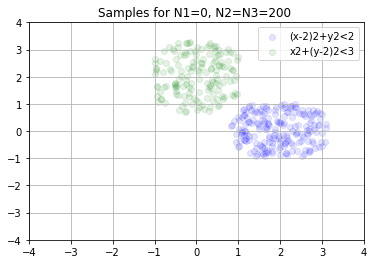

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
import pandas as pd
import math

# Create sample for hw2 - 2.(b)
S2 = []
X_1, X_2, X_3, Y_1, Y_2, Y_3 = [[], [], [], [], [], []]
label = ['(x-2)2+y2<2', 'x2+(y-2)2<3']
fig, ax = plt.subplots()

while (len(X_2) < 200 and len(X_3) < 200):
  if (len(X_2) < 200):
    x2 = np.random.uniform(2-math.sqrt(2), 2+math.sqrt(2))
    y2 = np.random.uniform(-1, 1)
    if ((x2-2)**2 + y2**2 < math.sqrt(2)):
      X_2.append(x2)
      Y_2.append(y2)
      S2.append([x2, y2])
  if (len(X_3) < 200):
    x3 = np.random.uniform(-1, 1)
    y3 = np.random.uniform(2-math.sqrt(3), 2+math.sqrt(3))
    if (x3**2 + (y3-2)**2 < math.sqrt(3)):
      X_3.append(x3)
      Y_3.append(y3)
      S2.append([x3, y3])

ax.scatter(X_2,Y_2, color='blue', label=label[0], alpha=0.1)
ax.scatter(X_3,Y_3, color='green', label=label[1], alpha=0.1)
ax.legend()
ax.grid(True)
plt.title("Samples for N1=0, N2=N3=200 ")
plt.xlim(-4,4) 
plt.ylim(-4,4)
plt.show()

* HW2의 2.(d)에 사용된 샘플 생성

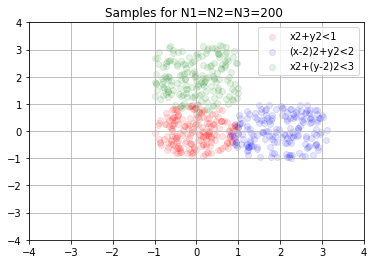

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
import pandas as pd
import math

# Create sample for hw2 - 2.(d)

S1 = []
X_1, X_2, X_3, Y_1, Y_2, Y_3 = [[], [], [], [], [], []]
label = ['x2+y2<1','(x-2)2+y2<2', 'x2+(y-2)2<3']
fig, ax = plt.subplots()

# p1 samples
while (len(X_1) < 200 and len(X_2) < 200 and len(X_3) < 200):
  if (len(X_1) < 200):
    x1 = np.random.uniform(-1, 1)
    y1 = np.random.uniform(-1, 1)
    if (x1**2 + y1**2 < 1):
      X_1.append(x1)
      Y_1.append(y1)
      S1.append([x1, y1])
  if (len(X_2) < 200):
    x2 = np.random.uniform(2-math.sqrt(2), 2+math.sqrt(2))
    y2 = np.random.uniform(-1, 1)
    if ((x2-2)**2 + y2**2 < math.sqrt(2)):
      X_2.append(x2)
      Y_2.append(y2)
      S1.append([x2, y2])
  if (len(X_3) < 200):
    x3 = np.random.uniform(-1, 1)
    y3 = np.random.uniform(2-math.sqrt(3), 2+math.sqrt(3))
    if (x3**2 + (y3-2)**2 < math.sqrt(3)):
      X_3.append(x3)
      Y_3.append(y3)
      S1.append([x3, y3])

ax.scatter(X_1,Y_1, color='red', label=label[0], alpha=0.1)
ax.scatter(X_2,Y_2, color='blue', label=label[1], alpha=0.1)
ax.scatter(X_3,Y_3, color='green', label=label[2], alpha=0.1)
ax.legend()
ax.grid(True)
plt.title("Samples for N1=N2=N3=200 ")
plt.xlim(-4,4) 
plt.ylim(-4,4)
plt.show()

* 아래에서 구현한 hebbian learning과 oja's rule에 대한 결과를 plot하기 위한 함수

In [ ]:
def plot_first_pca(type, method, W):
  if (type == 1):
    S = S1
  else:
    S = S2

  plt.quiver(0, 0, W[0][0], W[1][0], color=['r'], scale=5)
  for s in S:
    plt.scatter(s[0],s[1], color='black', alpha=0.1)

  if (type == 1):
    plt.title("["+method+"] Principal component; N1=N2=N3=200")
  else:
    plt.title("["+method+"] Principal component; N1=0, N2=N3=200")

  print("\n")
  plt.show()
  print("\n\n")

* hebbian learning과 oja's rule을 구현

In [ ]:
def pca_hebbian_learning(type):
  if (type == 1):
    S = S1
  else:
    S = S2
  X = np.array(S)

  # Normalizing X
  norm_X = X-X.mean(axis=0)
  norm_X = norm_X/X.std(axis=0)

  W = np.random.normal(scale=0.25, size=(2, 1))
  prev_W = np.ones((2, 1))

  eta = 0.0001
  tolerance = 1e-8

  while np.linalg.norm(prev_W - W) > tolerance:
      prev_W = W.copy()
      
      Ys = np.dot(norm_X, W)
      W += eta * np.sum(Ys*norm_X, axis=0).reshape((2, 1))
      # Normalizing W
      W = W / math.sqrt(W[0]**2 + W[1]**2)

  print("***Using hebbian learning***\n")
  print('eigenvector :\n', [W[0][0], W[1][0]])
  plot_first_pca(type, "hebbian learning", W)

def pca_oja(type):
  if (type == 1):
    S = S1
  else:
    S = S2
  X = np.array(S)

  # Normalizing X
  norm_X = X-X.mean(axis=0)
  norm_X = norm_X/X.std(axis=0)

  # Apply the Oja's rule
  W_oja = np.random.normal(scale=0.25, size=(2, 1))
  prev_W_oja = np.ones((2, 1))

  eta = 0.0001
  tolerance = 1e-8

  while np.linalg.norm(prev_W_oja - W_oja) > tolerance:
      prev_W_oja = W_oja.copy()
      
      Ys = np.dot(norm_X, W_oja)
      W_oja += eta * np.sum(Ys*norm_X - np.square(Ys)*W_oja.T, axis=0).reshape((2, 1))

  print("***Using Oja's rule***\n")
  print('eigenvector :\n', [W_oja[0][0], W_oja[1][0]])
  plot_first_pca(type, "Oja's rule", W_oja)

### Repeat hw2 2.(b)

***Using hebbian learning***

eigenvector :
 [0.70710691897839, -0.7071066433946783]




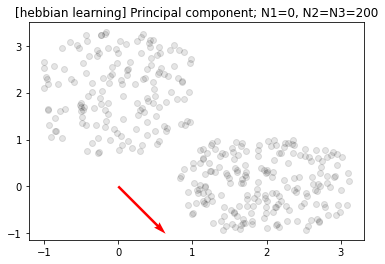




***Using Oja's rule***

eigenvector :
 [0.7071069119742174, -0.7071066503988451]




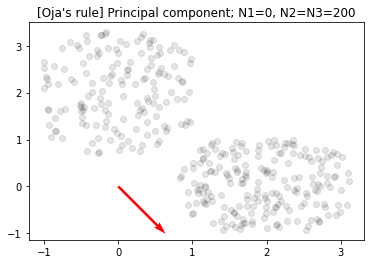

In [ ]:
pca_hebbian_learning(2)
pca_oja(2)

### Repeat hw2 2.(d)

***Using hebbian learning***

eigenvector :
 [0.7071069831385439, -0.7071065792344935]




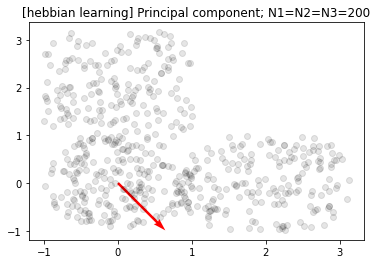




***Using Oja's rule***

eigenvector :
 [0.7071065945790422, -0.7071069677940044]




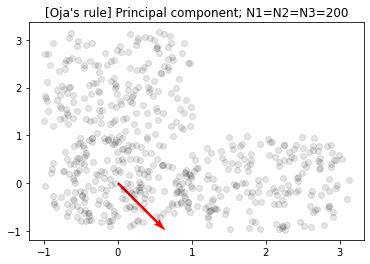

In [ ]:
pca_hebbian_learning(1)
pca_oja(1)

따라서 두 경우 모두 principle component를 잘 구하는 것을 알 수 있다. 이 때, hebbian learning과 Oja's rule로 구한 eigen vector의 방향이 서로 반대인 것을 확인할 수 있다.

# Problem 3

### Prerequisite

* 문제에 사용될 샘플 생성 함수

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
import pandas as pd
import math

def makeSample(S, T, N1, N2, c1, c2):
  X_1, X_2, Y_1, Y_2 = [[], [], [], []]
  label = ['exp(-1((x-1)^2+y^2)/2*{})'.format(c1),'exp(-1((x+1)^2+y^2)/2*{})'.format(c2)]
  fig, ax = plt.subplots()

  while (len(X_1) < N1 and len(X_2) < N2):
    if (len(X_1) < N1):
      x1 = np.random.uniform(-20, 20)
      y1 = np.random.uniform(-20, 20)
      p1 = np.exp(-1*((x1-1)**2+y1**2)/(2*c1)) / (2*c1*np.pi)
      isPlot = np.random.binomial(n=1, p=p1, size=1)
      if (isPlot):
        X_1.append(x1)
        Y_1.append(y1)
        S.append([x1, y1])
        T.append(-1)
    if (len(X_2) < N2):
      x2 = np.random.uniform(-20, 20)
      y2 = np.random.uniform(-20, 20)
      p2 = np.exp(-1*((x2+1)**2+y2**2)/(2*c2)) / (2*c2*np.pi)
      isPlot = np.random.binomial(n=1, p=p2, size=1)
      if (isPlot):
        X_2.append(x2)
        Y_2.append(y2)
        S.append([x2, y2])
        T.append(1)

  ax.scatter(X_1,Y_1, color='red', label=label[0], alpha=0.1)
  ax.scatter(X_2,Y_2, color='blue', label=label[1], alpha=0.1)
  ax.legend()
  ax.grid(True)
  plt.title("Samples for N1={}, N2={}, c1={}, c2={}".format(N1, N2, c1, c2))
  plt.show()
  return [X_1, X_2, Y_1, Y_2]

* Single-layer Perceptron 구현

In [ ]:
import numpy as np

class SingleLayerPerceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(X.shape[1])
        self.b_ = 0.5
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ +=  update * xi
                self.b_ +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return np.tanh(self.net_input(X))

* Decision boundary plot

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

def plot_result(S, T, XY):
  X_1, X_2, Y_1, Y_2 = XY
  ppn = SingleLayerPerceptron(epochs=500, eta=0.05)

  ppn.train(np.array(S), np.array(T))
  print('Weights: %s' % ppn.w_, 'theta: %s' % ppn.b_)
  x = np.arange(-5,5)
  plt.plot(x, -1*(ppn.w_[0]/ppn.w_[1])*x - ppn.b_/ppn.w_[1], color='black', linestyle='--')
  plt.scatter(X_1,Y_1, color='red', label=label[0], alpha=0.1)
  plt.scatter(X_2,Y_2, color='blue', label=label[1], alpha=0.1)
  plt.title('Single-layer Perceptron')
  plt.xlim(-4,4) 
  plt.ylim(-4,4)
  plt.show()

### (3.a)

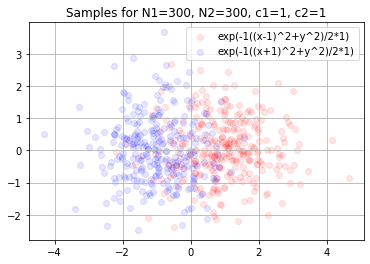

In [ ]:
S1 = []
Target1 = []
XY1 = makeSample(S1, Target1, 300, 300, 1, 1)

### (3.b)

Weights: [-0.86058887  0.20557022] theta: 0.1587505257003657


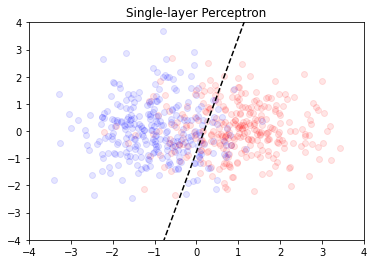

In [ ]:
plot_result(S1, Target1, XY1)

### (3.c)

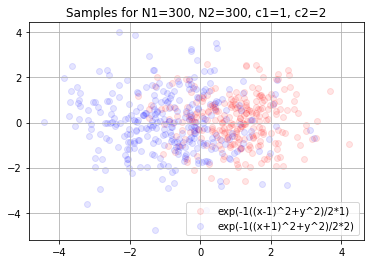

In [ ]:
S2 = []
Target2 = []
XY2 = makeSample(S2, Target2, 300, 300, 1, 2)

### (3.d)

Weights: [-0.35493321  0.05083462] theta: 0.4004075601281893


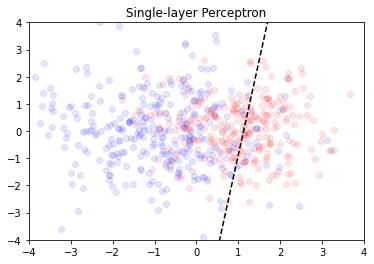

In [ ]:
plot_result(S2, Target2, XY2)

### (3.e)

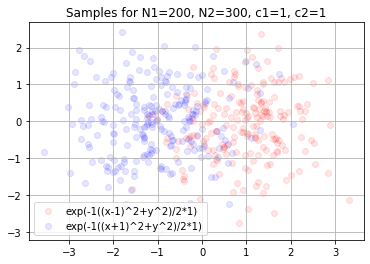

In [ ]:
S3 = []
Target3 = []
XY3 = makeSample(S3, Target3, 200, 300, 1, 1)

### (3.f)

Weights: [-0.83669452  0.25115418] theta: 0.01279634822696947


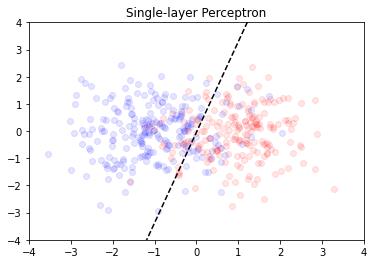

In [ ]:
plot_result(S3, Target3, XY3)